In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import typing

In [2]:
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

In [3]:
df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


## Exploring the data


In [4]:
print(df.shape)

(102599, 26)


In [5]:
df = df.astype({'room type':'category','cancellation_policy':'category',
                        'instant_bookable':'category','host_identity_verified':'category',
                        'review rate number':'category','neighbourhood group':'category'})
df['last review'] = pd.to_datetime(df['last review'])
#df = df.astype({'id':'float','host id':'float', 'calculated host listings count' : 'float', 'availability 365' : 'float', 'reviews per month' : 'float', 'Construction year' : 'float', 'minimum nights' : 'float', 'number of reviews' : 'float', 'lat' : 'float', 'long' : 'float',})

In [6]:
df['price']=df['price'].apply(lambda x: str(x).replace('$','') if pd.isna(x) == False else x)
df['service fee']=df['service fee'].apply(lambda x: str(x).replace('$','') if pd.isna(x) == False else x)
df['service fee']=df['service fee'].astype(float)
df['price']=df['price'].apply(lambda x: str(x).replace(',','') if pd.isna(x) == False else x)
df['price']=df['price'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  category      
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  category      
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [7]:
df_continuous = df.describe(include=np.number).transpose()
#display(df_continuous)


In [8]:
df_mode = df.mode(numeric_only=True).iloc[0]
df_continuous['mode'] = df_mode
total = df.shape[0]
df_continuous['total number of values'] = total
df_continuous['percentage of missing'] = 100-(100*df_continuous['count'] / total)

df_cardinality = df.nunique(dropna=False)
df_continuous['cardinality'] = df_cardinality


df_median = df.median(numeric_only=True)
df_continuous['median'] = df_median

df_continuous = df_continuous.round(decimals=2).astype(object)

In [9]:
df_continuous = df_continuous[['total number of values','percentage of missing', 'cardinality', 'min', 'max', '25%', '75%', 'mean', 'median', 'std']]
df_continuous = df_continuous.rename(columns={'mean ': 'average', 'std': 'standart deviation'})
display(df_continuous)


,total number of values,percentage of missing,cardinality,min,max,25%,75%,mean,median,standart deviation
id,102599,0.0,102058,1001254.0,57367417.0,15085814.5,43201198.0,29146234.52,29136603.0,16257505.61
host id,102599,0.0,102057,123600518.0,98763129024.0,24583328475.0,73996495817.0,49254111474.330002,49117739352.0,28538996644.369999
lat,102599,0.01,21992,40.5,40.92,40.69,40.76,40.73,40.72,0.06
long,102599,0.01,17775,-74.25,-73.71,-73.98,-73.93,-73.95,-73.95,0.05
Construction year,102599,0.21,21,2003.0,2022.0,2007.0,2017.0,2012.49,2012.0,5.77
price,102599,0.24,1152,50.0,1200.0,340.0,913.0,625.29,624.0,331.67
service fee,102599,0.27,232,10.0,240.0,68.0,183.0,125.03,125.0,66.33
minimum nights,102599,0.4,154,-1223.0,5645.0,2.0,5.0,8.14,3.0,30.55
number of reviews,102599,0.18,477,0.0,1024.0,1.0,30.0,27.48,7.0,49.51
reviews per month,102599,15.48,1017,0.01,90.0,0.22,2.0,1.37,0.74,1.75


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  category      
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  category      
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [11]:
#top = mode
df_categorical = df.describe(include='category').transpose()
df_categorical['total number of values'] = total
df_categorical['percentage of missing'] = 100-(100*df_categorical['count'] / total)


df_categorical['percentage of mode'] = (100*df_categorical['freq'] / total)

display(df_categorical)



,count,unique,top,freq,total number of values,percentage of missing,percentage of mode
host_identity_verified,102310,2,unconfirmed,51200,102599,0.281679,49.90302
neighbourhood group,102570,7,Manhattan,43792,102599,0.028265,42.682677
instant_bookable,102494,2,False,51474,102599,0.10234,50.17008
cancellation_policy,102523,3,moderate,34343,102599,0.074075,33.473036
room type,102599,4,Entire home/apt,53701,102599,0.0,52.340666
review rate number,102273.0,5.0,5.0,23369.0,102599,0.317742,22.777025


In [12]:
#for second mode
df_categorical2 = df[(df["host_identity_verified"] != str(df_categorical['top'].iloc[0])) & (df["neighbourhood group"] != str(df_categorical['top'].iloc[1]))
                    & (df["instant_bookable"] != str(df_categorical['top'].iloc[2])) & (df["cancellation_policy"] != str(df_categorical['top'].iloc[3])) &
                    (df["room type"] != str(df_categorical['top'].iloc[4])) & (df["review rate number"] != str(df_categorical['top'].iloc[5]))]

df_categorical_desc = df_categorical2.describe(include='category').transpose()

df_categorical['second mode'] = df_categorical_desc.top

df_categorical['frequency of second mode'] = df_categorical_desc['freq']
df_categorical['percentage of second mode'] = ((100*df_categorical_desc['freq']) / total)
display(df_categorical)


,count,unique,top,freq,total number of values,percentage of missing,percentage of mode,second mode,frequency of second mode,percentage of second mode
host_identity_verified,102310,2,unconfirmed,51200,102599,0.281679,49.90302,verified,10414,10.150196
neighbourhood group,102570,7,Manhattan,43792,102599,0.028265,42.682677,Brooklyn,7131,6.95036
instant_bookable,102494,2,False,51474,102599,0.10234,50.17008,False,5240,5.107262
cancellation_policy,102523,3,moderate,34343,102599,0.074075,33.473036,strict,5242,5.109212
room type,102599,4,Entire home/apt,53701,102599,0.0,52.340666,Private room,10041,9.786645
review rate number,102273.0,5.0,5.0,23369.0,102599,0.317742,22.777025,4.0,2470.0,2.407431


In [13]:
df_categorical = df_categorical[['total number of values','percentage of missing', 'unique', 'top', 'freq', 'percentage of mode', 'second mode', 'frequency of second mode', 'percentage of second mode']]
df_categorical = df_categorical.rename(columns={'neighbourhood group': 'neighbourhood_group', 'unique': 'cardinality', 'top': 'mode', 'freq': 'frequency of mode'})
display(df_categorical)


,total number of values,percentage of missing,cardinality,mode,frequency of mode,percentage of mode,second mode,frequency of second mode,percentage of second mode
host_identity_verified,102599,0.281679,2,unconfirmed,51200,49.90302,verified,10414,10.150196
neighbourhood group,102599,0.028265,7,Manhattan,43792,42.682677,Brooklyn,7131,6.95036
instant_bookable,102599,0.10234,2,False,51474,50.17008,False,5240,5.107262
cancellation_policy,102599,0.074075,3,moderate,34343,33.473036,strict,5242,5.109212
room type,102599,0.0,4,Entire home/apt,53701,52.340666,Private room,10041,9.786645
review rate number,102599,0.317742,5.0,5.0,23369.0,22.777025,4.0,2470.0,2.407431


## Histograms

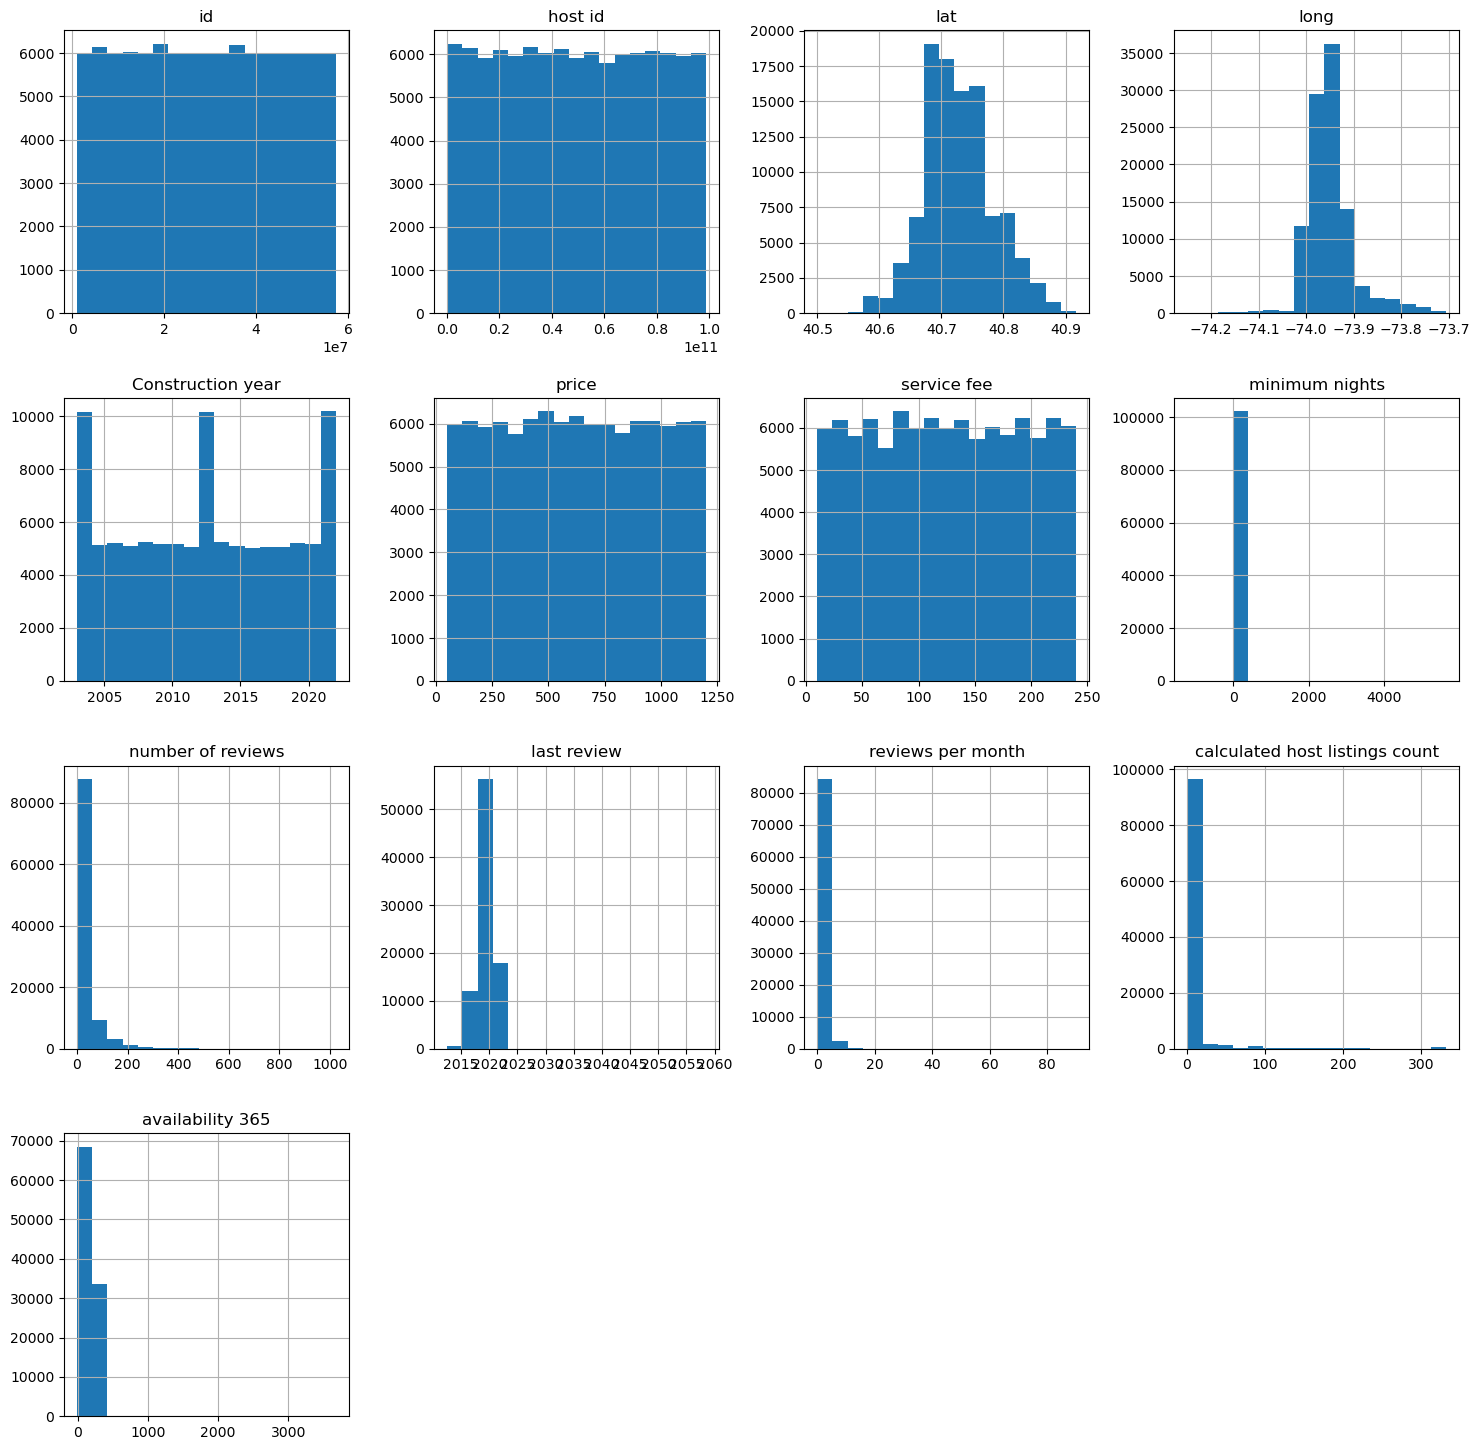

In [14]:

df_continuous = df_continuous.astype({'total number of values':'float','percentage of missing':'float',
                        'cardinality':'float','min':'float',
                        'max':'float','25%':'float','25%':'float','75%':'float','mean':'float','median':'float','standart deviation':'float'})
hist = df.hist(bins=17, figsize=(18,18))

## Data cleaning

In [15]:

df['host_identity_verified'].fillna(value=df_categorical['mode'].iloc[0], inplace=True)
df['neighbourhood group'].fillna(value=df_categorical['mode'].iloc[1], inplace=True)
df['instant_bookable'].fillna(value=df_categorical['mode'].iloc[2], inplace=True)
df['cancellation_policy'].fillna(value=df_categorical['mode'].iloc[3], inplace=True)
df['review rate number'].fillna(value=df_categorical['mode'].iloc[5], inplace=True)

df['lat'].fillna(value=df['lat'].mean(), inplace=True)
df['long'].fillna(value=df['long'].mean(), inplace=True)
df['Construction year'].fillna(value=df['Construction year'].mean(), inplace=True)
df['price'].fillna(value=df['price'].mean(), inplace=True)
df['service fee'].fillna(value=df['service fee'].mean(), inplace=True)
df['last review'].fillna(value=df['last review'].mean(), inplace=True)
df['availability 365'].fillna(value=df['availability 365'].mean(), inplace=True)

df['minimum nights'].fillna(value=0, inplace=True)
df['number of reviews'].fillna(value=0, inplace=True)
df['reviews per month'].fillna(value=0, inplace=True)

df['country'].fillna(value='US', inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102599 non-null  category      
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102599 non-null  category      
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102599 non-null  float64       
 8   long                            102599 non-null  float64       
 9   country                         102599 non-null  object        
 10  country code                    102468 non-null  object 

In [17]:
df.nunique().sort_values(ascending=False)

id                                102058
host id                           102057
NAME                               61281
lat                                21992
long                               17775
host name                          13190
last review                         2478
house_rules                         1976
price                               1152
reviews per month                   1017
number of reviews                    476
availability 365                     439
service fee                          232
neighbourhood                        224
minimum nights                       154
calculated host listings count        78
Construction year                     21
neighbourhood group                    7
review rate number                     5
room type                              4
cancellation_policy                    3
instant_bookable                       2
country                                2
host_identity_verified                 2
country code    

In [18]:
df.drop_duplicates(keep='first', inplace=True)

In [19]:
print(df.shape)

(102058, 26)


In [20]:
df['neighbourhood group'].value_counts()


Manhattan        43586
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [21]:
df['neighbourhood group'].replace(['manhatan','brookln'],['Manhattan','Brooklyn'],inplace=True)


In [22]:
df['neighbourhood group'].value_counts()

Manhattan        43587
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood group, dtype: int64

## Scatter plot

<AxesSubplot:xlabel='price', ylabel='service fee'>

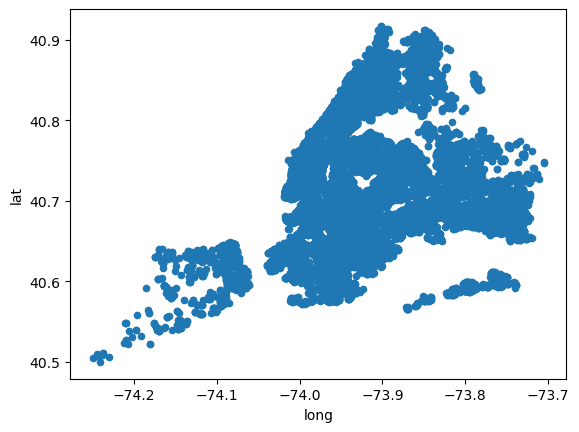

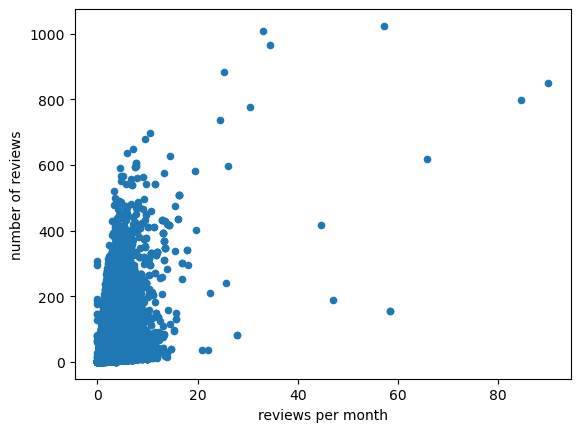

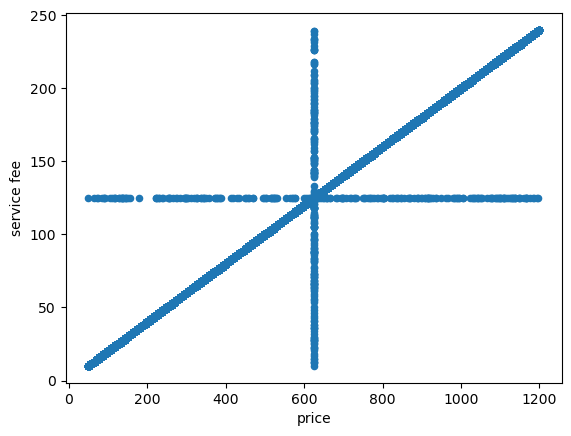

In [23]:
df.plot.scatter(y='lat',
                      x='long')
df.plot.scatter(y='number of reviews',
                      x='reviews per month')
df.plot.scatter(y='service fee',
                      x='price')

<AxesSubplot:xlabel='service fee', ylabel='minimum nights'>

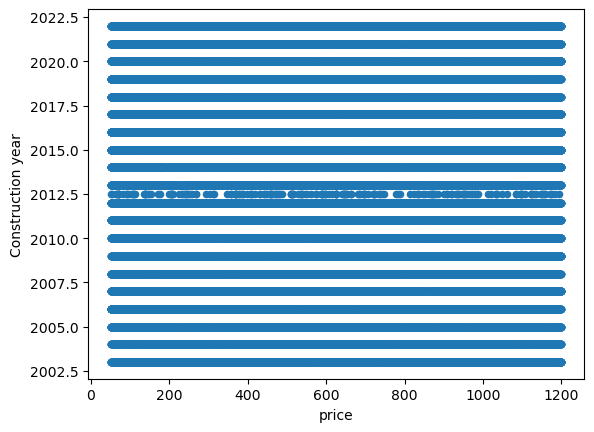

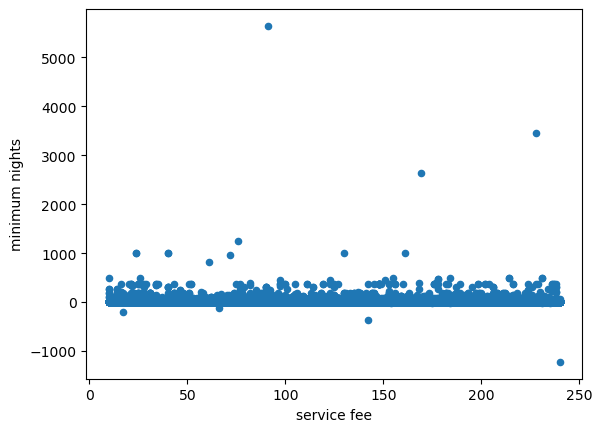

In [24]:
df.plot.scatter(y='Construction year',
                      x='price')
df.plot.scatter(y='minimum nights',
                      x='service fee')

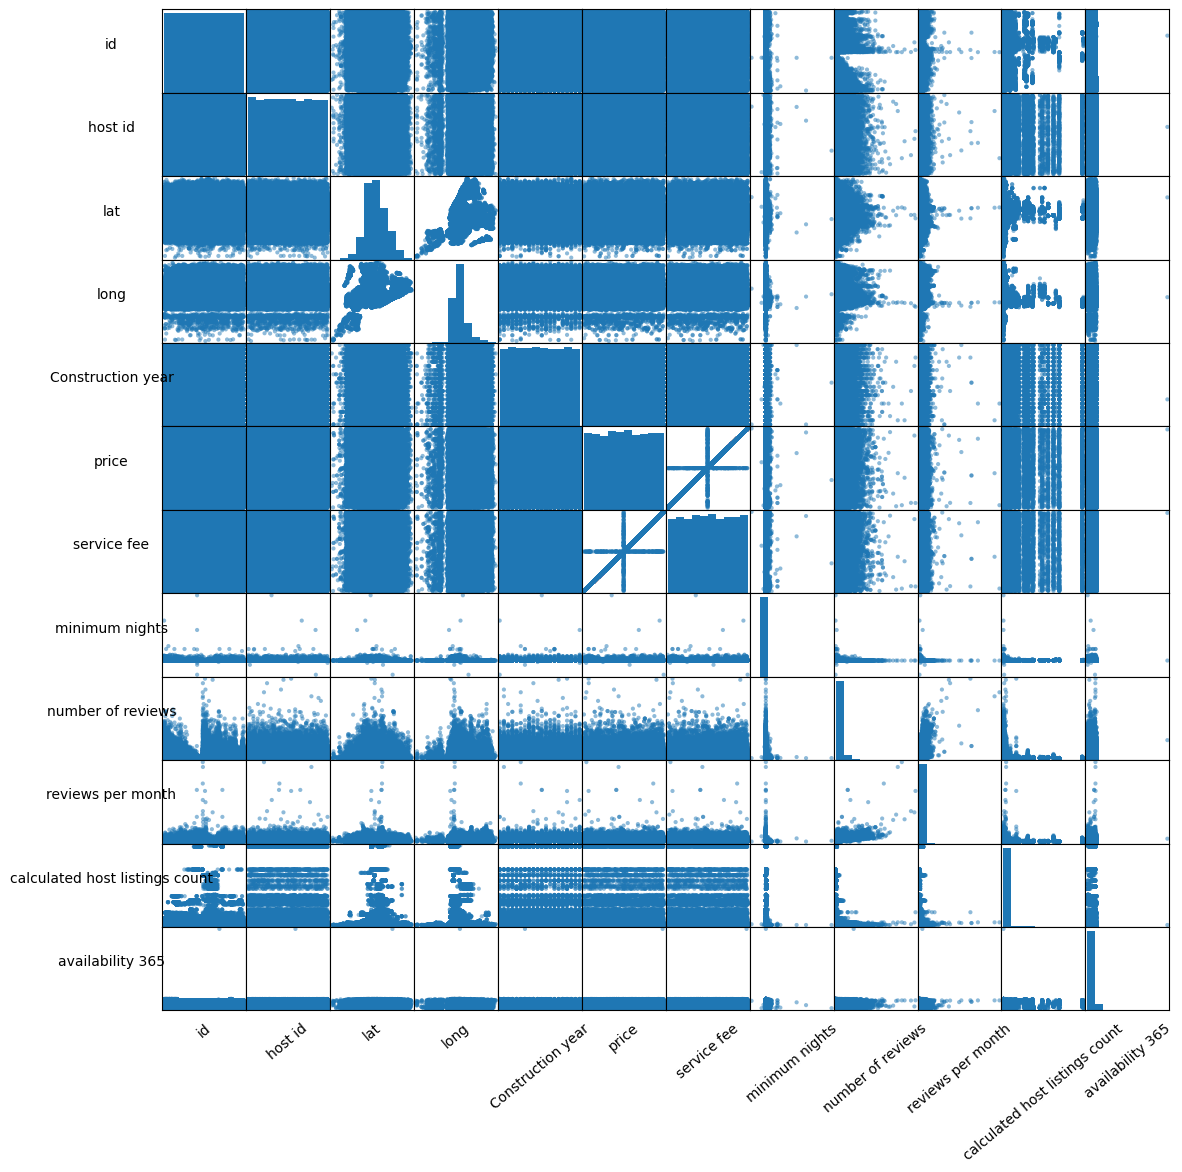

In [25]:
sm = pd.plotting.scatter_matrix(df, figsize=(13, 13), diagonal = 'hist')
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()


## Bar plot

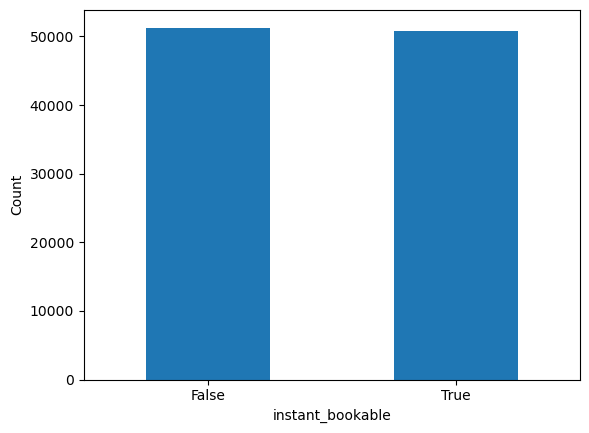

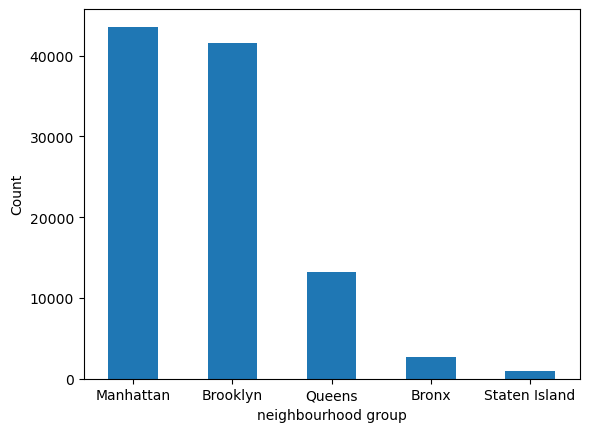

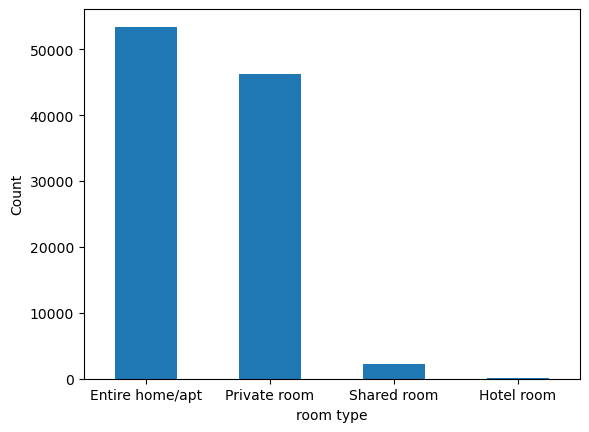

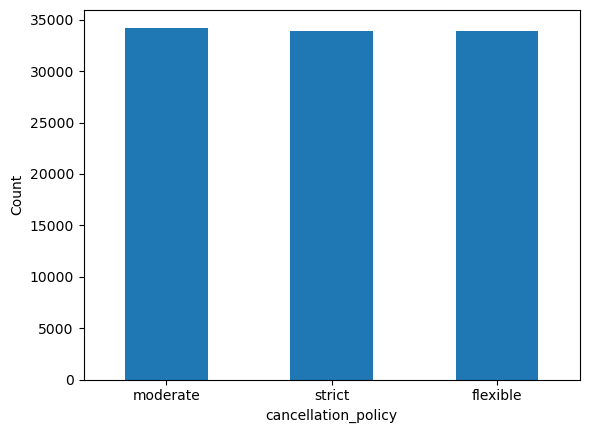

<AxesSubplot:xlabel='cancellation_policy', ylabel='Count'>

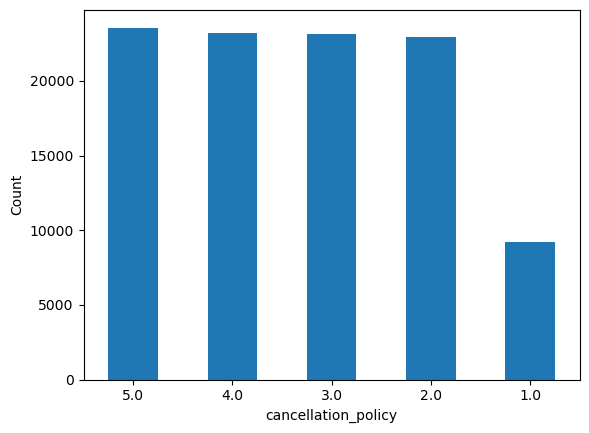

In [26]:
df['instant_bookable'].value_counts().plot(kind='bar', xlabel='instant_bookable', ylabel='Count', rot=0)
plt.show()
df['neighbourhood group'].value_counts().plot(kind='bar', xlabel='neighbourhood group', ylabel='Count', rot=0)
plt.show()      

df['room type'].value_counts().plot(kind='bar', xlabel='room type', ylabel='Count', rot=0)
plt.show() 
df['cancellation_policy'].value_counts().plot(kind='bar', xlabel='cancellation_policy', ylabel='Count', rot=0)
plt.show()
df['review rate number'].value_counts().plot(kind='bar', xlabel='cancellation_policy', ylabel='Count', rot=0)
 



## Box plot and histogram

<AxesSubplot:title={'center':'price'}, xlabel='room type'>

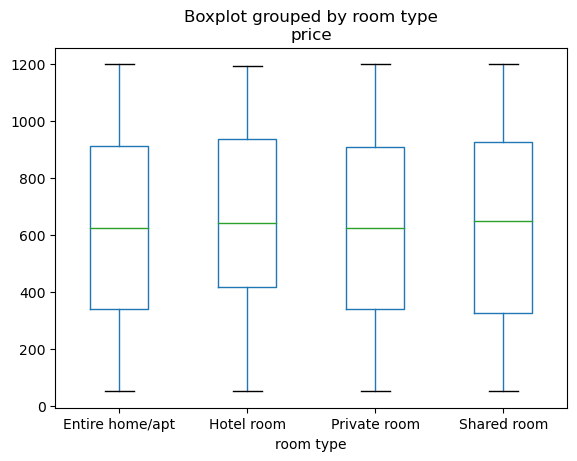

In [27]:
df.boxplot(column=['price'], by='room type', grid=False)

<AxesSubplot:title={'center':'price'}, xlabel='neighbourhood group'>

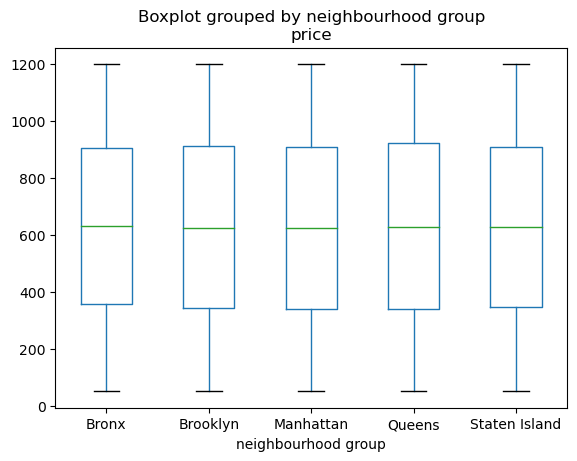

In [28]:
df.boxplot(column=['price'], by='neighbourhood group', grid=False)

<AxesSubplot:title={'center':'service fee'}, xlabel='cancellation_policy'>

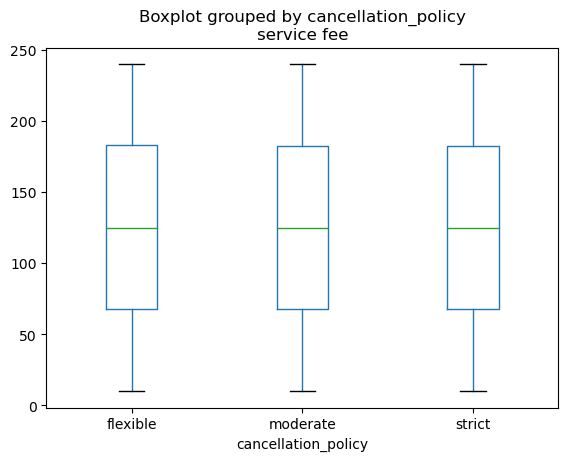

In [29]:
df.boxplot(column=['service fee'], by='cancellation_policy', grid=False)

array([[<AxesSubplot:title={'center':'Entire home/apt'}>,
        <AxesSubplot:title={'center':'Hotel room'}>],
       [<AxesSubplot:title={'center':'Private room'}>,
        <AxesSubplot:title={'center':'Shared room'}>]], dtype=object)

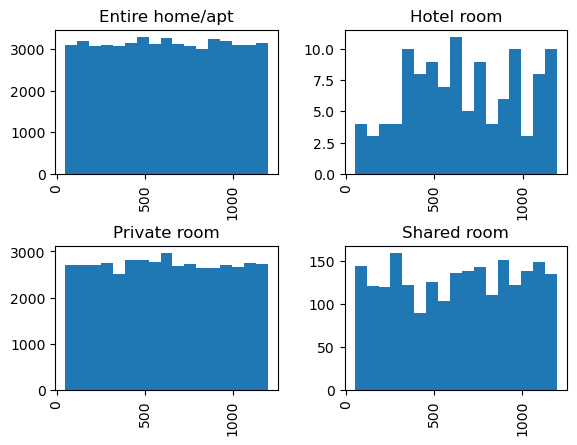

In [30]:
df.hist('price','room type', bins=17)

array([[<AxesSubplot:title={'center':'Bronx'}>,
        <AxesSubplot:title={'center':'Brooklyn'}>],
       [<AxesSubplot:title={'center':'Manhattan'}>,
        <AxesSubplot:title={'center':'Queens'}>],
       [<AxesSubplot:title={'center':'Staten Island'}>, <AxesSubplot:>]],
      dtype=object)

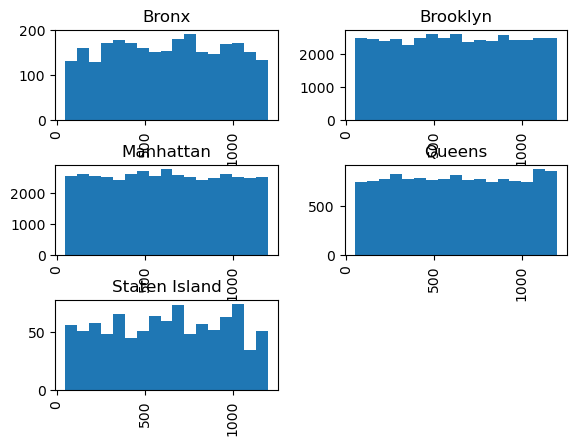

In [31]:
df.hist('price','neighbourhood group', bins=17)

array([[<AxesSubplot:title={'center':'flexible'}>,
        <AxesSubplot:title={'center':'moderate'}>],
       [<AxesSubplot:title={'center':'strict'}>, <AxesSubplot:>]],
      dtype=object)

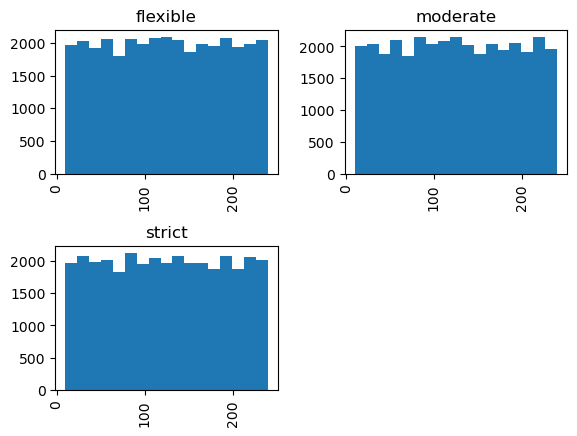

In [32]:
df.hist('service fee','cancellation_policy', bins=17)

# Covariance and correlation between continuous attributes & correlation matrix

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,calculated host listings count,availability 365
id,2.647690e+14,-5.521505e+14,-7814.358516,3.421377e+04,9.294820e+04,3.666639e+07,7.715161e+06,2.945849e+06,-3.384895e+07,1.254847e+06,1.262477e+07,-3.056157e+08
host id,-5.521505e+14,8.143841e+20,619767.773581,-1.243723e+07,7.759981e+08,3.421822e+10,6.450777e+09,-2.028219e+09,-6.778937e+09,-1.451421e+08,1.595965e+09,-8.327948e+09
lat,-7.814359e+03,6.197678e+05,0.003119,2.057589e-04,1.763980e-03,-1.030501e-01,-2.054843e-02,2.538209e-02,-6.963829e-02,-2.403532e-03,5.821498e-02,-3.806398e-02
long,3.421377e+04,-1.243723e+07,0.000206,2.450212e-03,4.216282e-04,5.495769e-02,1.048213e-02,-5.957695e-02,1.691699e-01,1.008642e-02,-1.665398e-01,3.886731e-01
Construction year,9.294820e+04,7.759981e+08,0.001764,4.216282e-04,3.317517e+01,-7.084733e+00,-1.292987e+00,-8.708079e-02,5.277161e-01,3.517579e-02,-4.880003e-01,-6.281244e+00
price,3.666639e+07,3.421822e+10,-0.103050,5.495769e-02,-7.084733e+00,1.097405e+05,2.189471e+04,-3.282290e+01,8.495133e+01,2.862876e+00,-1.023517e+00,-1.233795e+02
service fee,7.715161e+06,6.450777e+09,-0.020548,1.048213e-02,-1.292987e+00,2.189471e+04,4.387358e+03,-6.928838e+00,1.663491e+01,5.546345e-01,1.069569e-01,-2.771330e+01
minimum nights,2.945849e+06,-2.028219e+09,0.025382,-5.957695e-02,-8.708079e-02,-3.282290e+01,-6.928838e+00,9.339661e+02,-7.549292e+01,-4.721392e+00,8.312863e+01,2.422952e+02
number of reviews,-3.384895e+07,-6.778937e+09,-0.069638,1.691699e-01,5.277161e-01,8.495133e+01,1.663491e+01,-7.549292e+01,2.454307e+03,5.149699e+01,-1.289035e+02,6.619881e+02
reviews per month,1.254847e+06,-1.451421e+08,-0.002404,1.008642e-02,3.517579e-02,2.862876e+00,5.546345e-01,-4.721392e+00,5.149699e+01,2.829743e+00,-2.155521e+00,1.652568e+01


,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,calculated host listings count,availability 365
id,1.000000,-0.001189,-0.008599,0.042478,0.000992,0.006802,0.007158,0.005924,-0.041990,0.045844,0.024062,-0.138991
host id,-0.001189,1.000000,0.000389,-0.008805,0.004721,0.003620,0.003413,-0.002326,-0.004795,-0.003023,0.001733,-0.002160
lat,-0.008599,0.000389,1.000000,0.074427,0.005484,-0.005570,-0.005555,0.014871,-0.025169,-0.025583,0.032314,-0.005044
long,0.042478,-0.008805,0.074427,1.000000,0.001479,0.003352,0.003197,-0.039383,0.068985,0.121133,-0.104230,0.058107
Construction year,0.000992,0.004721,0.005484,0.001479,1.000000,-0.003713,-0.003389,-0.000495,0.001849,0.003630,-0.002626,-0.008070
price,0.006802,0.003620,-0.005570,0.003352,-0.003713,1.000000,0.997825,-0.003242,0.005176,0.005137,-0.000096,-0.002756
service fee,0.007158,0.003413,-0.005555,0.003197,-0.003389,0.997825,1.000000,-0.003423,0.005069,0.004978,0.000050,-0.003096
minimum nights,0.005924,-0.002326,0.014871,-0.039383,-0.000495,-0.003242,-0.003423,1.000000,-0.049863,-0.091840,0.084178,0.058671
number of reviews,-0.041990,-0.004795,-0.025169,0.068985,0.001849,0.005176,0.005069,-0.049863,1.000000,0.617937,-0.080627,0.098885
reviews per month,0.045844,-0.003023,-0.025583,0.121133,0.003630,0.005137,0.004978,-0.091840,0.617937,1.000000,-0.039701,0.072699


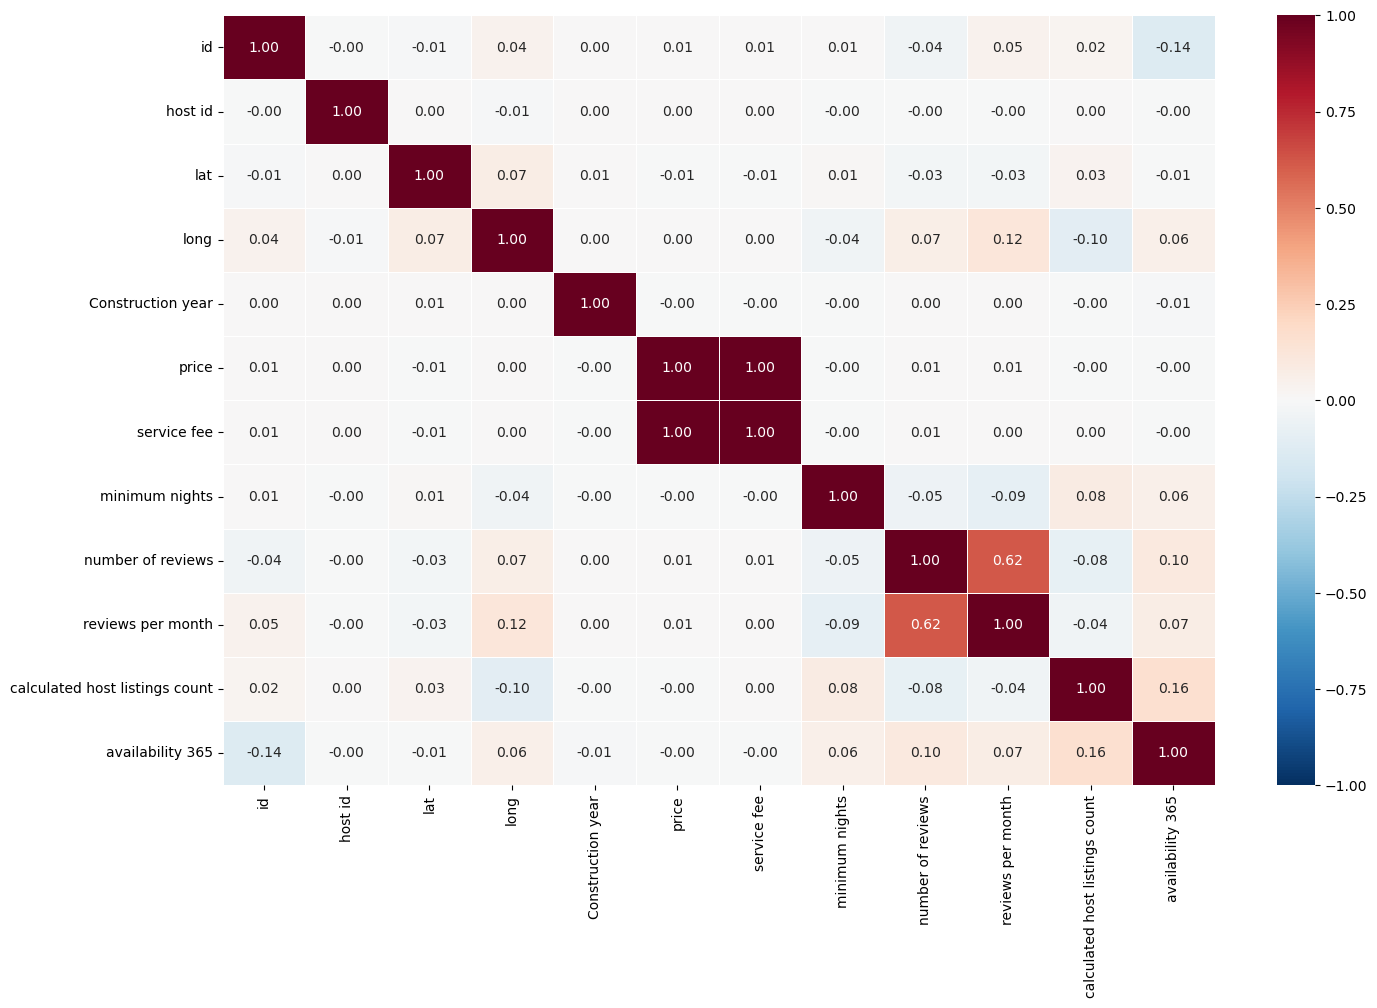

In [33]:
# calculate the correlation and covariance
corr = df.corr()
cov = df.cov()
display(cov)
display(corr)
# plot the heatmap, with blue red color map
plt.figure(figsize = (16, 10))
sns.heatmap(corr, cmap='RdBu_r', vmin=-1, vmax=1, center=0, annot=True, linewidths=0.5, fmt='.2f')
plt.show()



In [34]:
df.to_csv('Airbnb.csv')

## Data normalization

In [35]:
df_min_max_scaled = df.select_dtypes(np.number)
  
# apply min-max scaling [0;1]
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
display(df_min_max_scaled)

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,calculated host listings count,availability 365
0,0.000000,0.809928,0.354044,0.509474,0.894737,0.796522,0.795652,0.179528,0.008789,0.002333,0.015106,0.080282
1,0.000015,0.529317,0.608442,0.488542,0.210526,0.080000,0.078261,0.182440,0.043945,0.004222,0.003021,0.064551
2,0.000020,0.797912,0.741239,0.565422,0.105263,0.495652,0.495652,0.178509,0.000000,0.000000,0.000000,0.098183
3,0.000027,0.861467,0.444293,0.532628,0.105263,0.276522,0.278261,0.182440,0.263672,0.051556,0.000000,0.090046
4,0.000043,0.931817,0.716046,0.561584,0.315789,0.133913,0.134783,0.179528,0.008789,0.001111,0.000000,0.081096
...,...,...,...,...,...,...,...,...,...,...,...,...
102053,0.999961,0.782679,0.358742,0.530205,0.499340,0.561739,0.500117,0.179091,0.011719,0.004889,0.000000,0.002712
102054,0.999971,0.464445,0.476845,0.592450,0.499340,0.746957,0.500117,0.178218,0.018555,0.008000,0.003021,0.002712
102055,0.999980,0.240040,0.427417,0.627263,0.499340,0.293043,0.500117,0.178363,0.048828,0.034667,0.003021,0.066450
102056,0.999990,0.156828,0.749533,0.563090,0.499340,0.693913,0.500117,0.178363,0.000000,0.000000,0.000000,0.002712


## Convert categorical to continuous

In [36]:
display(df_categorical)

,total number of values,percentage of missing,cardinality,mode,frequency of mode,percentage of mode,second mode,frequency of second mode,percentage of second mode
host_identity_verified,102599,0.281679,2,unconfirmed,51200,49.90302,verified,10414,10.150196
neighbourhood group,102599,0.028265,7,Manhattan,43792,42.682677,Brooklyn,7131,6.95036
instant_bookable,102599,0.10234,2,False,51474,50.17008,False,5240,5.107262
cancellation_policy,102599,0.074075,3,moderate,34343,33.473036,strict,5242,5.109212
room type,102599,0.0,4,Entire home/apt,53701,52.340666,Private room,10041,9.786645
review rate number,102599,0.317742,5.0,5.0,23369.0,22.777025,4.0,2470.0,2.407431


In [37]:
df = df.rename(columns={'neighbourhood group': 'neighbourhood_group', 'room type': 'room_type', 'review rate number': 'review_rate_number'})

In [38]:
dummies = pd.get_dummies(df.neighbourhood_group)
df_converted = pd.concat([df, dummies], axis='columns')
df_converted.drop(['neighbourhood_group'], axis='columns')

dummies = pd.get_dummies(df.host_identity_verified)
df_converted = pd.concat([df_converted, dummies], axis='columns')
df_converted.drop(['host_identity_verified'], axis='columns')

dummies = pd.get_dummies(df.instant_bookable)
df_converted = pd.concat([df_converted, dummies], axis='columns')
df_converted.drop(['instant_bookable'], axis='columns')

dummies = pd.get_dummies(df.cancellation_policy)
df_converted = pd.concat([df_converted, dummies], axis='columns')
df_converted.drop(['cancellation_policy'], axis='columns')

dummies = pd.get_dummies(df.room_type)
df_converted = pd.concat([df_converted, dummies], axis='columns')
df_converted.drop(['room_type'], axis='columns')

dummies = pd.get_dummies(df.review_rate_number)
df_converted = pd.concat([df_converted, dummies], axis='columns')
df_converted.drop(['review_rate_number'], axis='columns')

,id,NAME,host id,host_identity_verified,host name,neighbourhood_group,neighbourhood,lat,long,country,...,strict,Entire home/apt,Hotel room,Private room,Shared room,1.0,2.0,3.0,4.0,5.0
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,1,0,0,1,0,0,0,0,1,0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,0,1,0,0,0,0,0,0,1,0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,0,0,0,1,0,0,0,0,0,1
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,0,1,0,0,0,0,0,0,1,0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,0,0,0,1,0,0,0,0,0,1
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,0,0,0,1,0,0,0,1,0,0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,0,1,0,0,0,0,0,0,1,0
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,1,0,0,1,0,1,0,0,0,0


# Lab 3

In [39]:
df_ANN = df_min_max_scaled.copy()
df_ANN =df_ANN.drop('id', axis=1)
df_ANN =df_ANN.drop('host id', axis=1)
df_ANN = df_ANN.fillna(df_ANN.mean())


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
X_train, X_test, y_train, y_test = train_test_split(
    df_ANN.drop('price', axis=1), df_ANN[['price']], 
    test_size=0.2, random_state=3)

In [41]:
df_ANN.head()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,calculated host listings count,availability 365
0,0.354044,0.509474,0.894737,0.796522,0.795652,0.179528,0.008789,0.002333,0.015106,0.080282
1,0.608442,0.488542,0.210526,0.080000,0.078261,0.182440,0.043945,0.004222,0.003021,0.064551
2,0.741239,0.565422,0.105263,0.495652,0.495652,0.178509,0.000000,0.000000,0.000000,0.098183
3,0.444293,0.532628,0.105263,0.276522,0.278261,0.182440,0.263672,0.051556,0.000000,0.090046
4,0.716046,0.561584,0.315789,0.133913,0.134783,0.179528,0.008789,0.001111,0.000000,0.081096


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def run_10_fold_cross_validation(df: pd.DataFrame, layersize, activationfunc, solver, learningrate, **kwargs) -> np.ndarray:
    """ 
    Run a 10-fold cross-validation

    Parameters
    --------
    df: full development dataset

    Returns
    --------
    scores_cv: individual scores for all cross-validation splits.

    """
    # we use the whole dataset now, and split it up into train and valid 
    # using a 10-fold cross-validation strategy.

    scores_cv = None
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    # YOUR CODE HERE
    scores_cv = cross_val_score(MLPRegressor(hidden_layer_sizes = layersize, activation = activationfunc, solver = solver, learning_rate_init = learningrate ), X_train, y_train, cv=cv)

    return scores_cv

In [43]:
from sklearn.model_selection import GridSearchCV
parameter_space = \
    {
        "hidden_layer_sizes": [(5,5,4), (10), (5), (10,10,10)],
        "activation": ["tanh", "relu"],
        "solver": ["sgd"],
        "learning_rate_init" : [0.1, 0.01, 0.2, 0.3],
    }

clf = GridSearchCV(MLPRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)
clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)


C:\Users\eylul\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-0.00938014 -0.01226795 -0.01456846 -0.00560423 -0.01045837 -0.01166375
 -0.01531689         nan -0.00636304 -0.01046062 -0.00540152 -0.00622407
 -0.01210872 -0.0133393  -0.01251622         nan -0.24952229 -0.24914805
 -0.24956238 -0.24946313 -0.00733306 -0.00748363 -0.01168209 -0.01376882
 -0.00305005 -0.00572094 -0.00280053 -0.00288367 -0.00575786 -0.00602258
 -0.00789793 -0.24978877]
  warnings.warn(
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters:
{'activation': 'relu', 'hidden_layer_sizes': 5, 'learning_rate_init': 0.2, 'solver': 'sgd'}


In [44]:
##experiment here

layersize = (5)
activationfunc = "relu" 
solver = "sgd" 
learningrate = 0.2

scores_cv = run_10_fold_cross_validation(df_ANN, layersize, activationfunc, solver, learningrate)
print(f"(best)cross-validation scores: {scores_cv} \n\n(best)Mean: {scores_cv.mean():.4f}")

C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

(best)cross-validation scores: [ 9.94742908e-01  9.96010230e-01  9.95139743e-01  9.95086728e-01
 -4.53247355e-05  9.96341881e-01  9.95738908e-01  9.94503102e-01
  9.95173126e-01  9.97337833e-01] 

(best)Mean: 0.8960


In [45]:
layersize = (5, 5, 4)
activationfunc = "relu" 
solver = "sgd" 
learningrate = 0.1

scores_cv = run_10_fold_cross_validation(df_ANN, layersize, activationfunc, solver, learningrate)
print(f"Initial cross-validation scores: {scores_cv} \n\nInitial Mean: {scores_cv.mean():.4f}")

C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

Initial cross-validation scores: [ 9.94475719e-01  9.95831883e-01  9.95905323e-01  9.94988647e-01
 -8.20355810e-04  9.96701952e-01  9.95642060e-01  9.94424207e-01
  9.95149192e-01  9.97108744e-01] 

Initial Mean: 0.8959


In [46]:
##experiment here

layersize = (5, 5, 4)
activationfunc = "relu" 
solver = "sgd" 
learningrate = 0.2

scores_cv = run_10_fold_cross_validation(df_ANN, layersize, activationfunc, solver, learningrate)
print(f"(learning rate changed)cross-validation scores: {scores_cv} \n\n(learning rate changed)Mean: {scores_cv.mean():.4f}")

C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

(learning rate changed)cross-validation scores: [ 0.99320628 -0.0107882   0.99562603  0.99508317 -0.00324227 -0.01065808
  0.99246004 -0.02037374  0.99515442  0.99213811] 

(learning rate changed)Mean: 0.5919


In [47]:
##experiment here

layersize = (5, 5, 4)
activationfunc = "relu" 
solver = "sgd" 
learningrate = 0.2

scores_cv = run_10_fold_cross_validation(df_ANN, layersize, activationfunc, solver, learningrate)
print(f"(learning rate changed)cross-validation scores: {scores_cv} \n\n(learning rate changed)Mean: {scores_cv.mean():.4f}")

C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

(learning rate changed)cross-validation scores: [ 9.94576769e-01 -1.29480174e-03 -3.94268131e-03  9.92044301e-01
 -2.76494918e-03  9.96383034e-01 -1.60552977e-06  9.94571705e-01
  9.94543138e-01  9.93839107e-01] 

(learning rate changed)Mean: 0.5958


In [48]:
##experiment here

layersize = (5, 5, 4)
activationfunc = "tanh" 
solver = "sgd" 
learningrate = 0.01

scores_cv = run_10_fold_cross_validation(df_ANN, layersize, activationfunc, solver, learningrate)
print(f"(act. func. changed)cross-validation scores: {scores_cv} \n\n(act. func. changed)Mean: {scores_cv.mean():.4f}")

C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

(act. func. changed)cross-validation scores: [0.9932565  0.99424914 0.99372926 0.99357988 0.99452004 0.99277638
 0.99230002 0.99205701 0.99269115 0.99601644] 

(act. func. changed)Mean: 0.9935


In [49]:
layersize = (5)
activationfunc = "tanh" 
solver = "sgd" 
learningrate = 0.01

scores_cv = run_10_fold_cross_validation(df_ANN, layersize, activationfunc, solver, learningrate)
print(f"(ANN changed)Initial cross-validation scores: {scores_cv} \n\n(ANN changed)Initial Mean: {scores_cv.mean():.4f}")

C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

(ANN changed)Initial cross-validation scores: [0.9914509  0.99376628 0.99393262 0.99375611 0.99302962 0.99445927
 0.99495818 0.99235678 0.99303429 0.99587226] 

(ANN changed)Initial Mean: 0.9937


In [50]:
layersize = (5)
activationfunc = "relu" 
solver = "sgd" 
learningrate = 0.01

scores_cv = run_10_fold_cross_validation(df_ANN, layersize, activationfunc, solver, learningrate)
print(f"(act. changed)Initial cross-validation scores: {scores_cv} \n\n(act. changed)Initial Mean: {scores_cv.mean():.4f}")

C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eylul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

(act. changed)Initial cross-validation scores: [0.99409456 0.99491267 0.99562993 0.99425831 0.99597069 0.99657491
 0.99517906 0.99335612 0.99396859 0.99629759] 

(act. changed)Initial Mean: 0.9950
